# Introduction to wavelets

This closely follows Alexandre Sauve's [A gentle introduction to wavelet [sic] for data analysis](https://www.kaggle.com/asauve/a-gentle-introduction-to-wavelet-for-data-analysis/comments)


<font color='darkgreen'>**As this notebook is lengthy, readers will find it much easier to navigate with [Jupyter Nbextensions](https://github.com/ipython-contrib/jupyter_contrib_nbextensions) installed, and Table of Contents (2) selected:**</font>

## Preliminaries

### Python imports

**Next two lines are for pretty output for all prints in a cell, not just the last.**

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**`DataSci` contains generally helpful data science stuff, while `plotHelpers` includes plot functions specifically.**

In [2]:
import sys
sys.path.append('/home/wilber/work/Mlib')
from utility import DataSci as util
import plotHelpers as ph

In [26]:
from time import time, asctime, gmtime
print(asctime(gmtime()))

t0 = time()

# from platform import node
import os
# from os.path import exists
# import shutil
# from glob import glob
# from random import random
# from collections import Counter, OrderedDict
# import gc		# garbage collection module
# import pprint
# import pickle
import timeit

print("Python version: ", sys.version_info[:])
print("Un-versioned imports:\n")
if 'sys' in sys.modules:
    print('sys', end="")
if 'utility' in sys.modules:
    print(', utility', end="")
if 'plotHelpers' in sys.modules:
    print(', plotHelpers', end="")
if 'platform' in sys.modules:
    print(', platform', end="")
if 'os' in sys.modules:
    print(', os', end="")
if 'os.path' in sys.modules:
    print(', os.path', end="")
if 'shutil' in sys.modules:
    print(', shutil', end="")
if 'glob' in sys.modules:
    print(', glob', end="")
if 'random' in sys.modules:
    print(', random', end="")
if 'collections' in sys.modules:
    print(', collections', end="")
if 'gc' in sys.modules:
    print(', gc', end="")
if 'pprint' in sys.modules:
    print(', pprint', end="")
if 'pickle' in sys.modules:
    print(', pickle', end="")
if 'timeit' in sys.modules:
    print(', timeit', end="")

duVersion = None
# from dateutil import __version__ as duVersion
# from dateutil.parser import parse
import numpy as np
import pandas as pd
# import pyreadr
import scaleogram as scg
import pywt

scVersion = None
# from scipy import __version__ as scVersion
# import scipy.sparse as sp

jlVersion = None
# from joblib import __version__ as jlVersion
# from joblib import dump, load

import seaborn as sns
import colorcet as cc
from matplotlib import __version__ as mpVersion
import matplotlib.pyplot as plt

print("\n")
if 'dateutil' in sys.modules:
    print(f"dateutil: {duVersion}", end="\t")
if 'numpy' in sys.modules:
    print(f"numpy: {np.__version__}", end="\t")
if 'pandas' in sys.modules:
    print(f"pandas: {pd.__version__}", end="\t")
if 'pyreader' in sys.modules:
    print(f"pyreader: {pyreader.__version__}", end="\t")
if 'scaleogram' in sys.modules:
    print(f"scaleogram: {scg.__version__}", end="\t")
if 'pywt' in sys.modules:
    print(f"pywt: {pywt.__version__}", end="\t")
if 'scipy' in sys.modules:
    print(f"scipy: {scVersion}", end="\t")
if 'joblib' in sys.modules:
    print(f"joblib: {jlVersion}", end="\t")
if 'seaborn' in sys.modules:
    print(f"seaborn: {sns.__version__}", end="\t")
if 'colorcet' in sys.modules:
    print(f"colorcet: {cc.__version__}", end="\t")
if 'matplotlib' in sys.modules:
    print(f"matplotlib: {mpVersion}", end="\t")
# if '' in sys.modules:
#     print(f": {.__version__}", end="\t")
Δt = time() - t0
print(f"\n\nΔt: {Δt: 4.1f}s.")

%matplotlib inline

Tue Sep 17 02:13:18 2019
Python version:  (3, 7, 4, 'final', 0)
Un-versioned imports:

sys, utility, plotHelpers, platform, os, os.path, shutil, glob, random, collections, gc, pprint, pickle, timeit

dateutil: None	numpy: 1.16.4	pandas: 0.24.2	scaleogram: 0.9.5	pywt: 1.0.3	scipy: None	joblib: None	seaborn: 0.9.0	colorcet: 1.0.0	matplotlib: 3.1.0	

Δt:  0.0s.


### Nino 3 data  set

#### Load data

In [9]:
nino3 = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
nino3 = pd.read_table(nino3)
nino3 = nino3.squeeze()
nino3.head()
nino3.tail()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


0   -0.30
1   -0.14
2   -0.41
3   -0.46
4   -0.66
Name: -0.15, dtype: float64

498   -0.22
499    0.08
500   -0.08
501   -0.18
502   -0.06
Name: -0.15, dtype: float64

In [10]:
N = nino3.size
print(N)

503


##### Create a time variable

* Time series starts in 1871, and intervals are quarterly

In [11]:
t0 = 1871
dt = 0.25
year = np.arange(0, N) * dt + t0
year

array([1871.  , 1871.25, 1871.5 , 1871.75, 1872.  , 1872.25, 1872.5 ,
       1872.75, 1873.  , 1873.25, 1873.5 , 1873.75, 1874.  , 1874.25,
       1874.5 , 1874.75, 1875.  , 1875.25, 1875.5 , 1875.75, 1876.  ,
       1876.25, 1876.5 , 1876.75, 1877.  , 1877.25, 1877.5 , 1877.75,
       1878.  , 1878.25, 1878.5 , 1878.75, 1879.  , 1879.25, 1879.5 ,
       1879.75, 1880.  , 1880.25, 1880.5 , 1880.75, 1881.  , 1881.25,
       1881.5 , 1881.75, 1882.  , 1882.25, 1882.5 , 1882.75, 1883.  ,
       1883.25, 1883.5 , 1883.75, 1884.  , 1884.25, 1884.5 , 1884.75,
       1885.  , 1885.25, 1885.5 , 1885.75, 1886.  , 1886.25, 1886.5 ,
       1886.75, 1887.  , 1887.25, 1887.5 , 1887.75, 1888.  , 1888.25,
       1888.5 , 1888.75, 1889.  , 1889.25, 1889.5 , 1889.75, 1890.  ,
       1890.25, 1890.5 , 1890.75, 1891.  , 1891.25, 1891.5 , 1891.75,
       1892.  , 1892.25, 1892.5 , 1892.75, 1893.  , 1893.25, 1893.5 ,
       1893.75, 1894.  , 1894.25, 1894.5 , 1894.75, 1895.  , 1895.25,
       1895.5 , 1895

#### Plot time series

Text(0, 0.5, '$^{\\circ}$C')

Text(0.5, 0, 'year')

Text(0.5, 0.98, 'NINO3 SST')

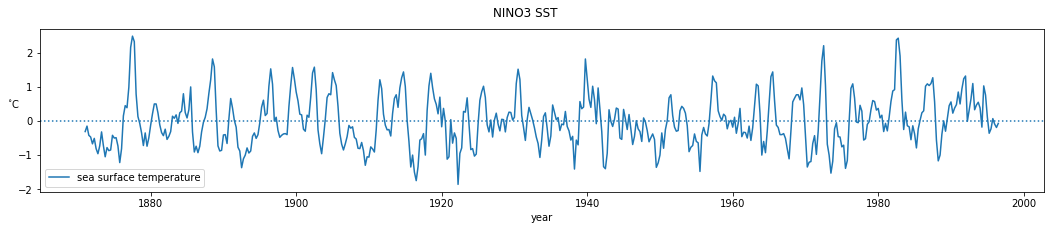

In [24]:
units = '$^{\circ}$C'
label = 'NINO3 SST'

fig, axis = plt.subplots(1, 1, figsize=(18, 3))
axis.plot(year, nino3, label = 'sea surface temperature')
axis.set_ylabel(units, rotation=0.0)
axis.set_xlabel('year')
axis.axhline(y=0.0, linestyle=':')
axis.legend()
plt.suptitle(label)